## Welcome!

The purpose of this notebook is to recall simple **[scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html)** functionality for random variables with different distributions.

In [5]:
import matplotlib.pyplot as plt
import numpy as np

In [6]:
import seaborn as sns 
sns.set(style="whitegrid")
%config InlineBackend.figure_format = 'retina'
%config Completer.use_jedi = False

## Discrete Random Variables

#### [Bernoulli](https://en.wikipedia.org/wiki/Bernoulli_distribution)

In [7]:
from scipy.stats import bernoulli # Importing the object

# Set the parameter
p = 0.5 

# Get some Statistics with the method stats
mean, var, skew, kurt = bernoulli.stats(p, moments='mvsk')
print(mean, var, skew, kurt, sep=" ; ")

0.5 ; 0.25 ; 0.0 ; -2.0


**Note:** Remember that you can always use the help to get more information about a particular object or method.

In [8]:
#help(bernoulli)

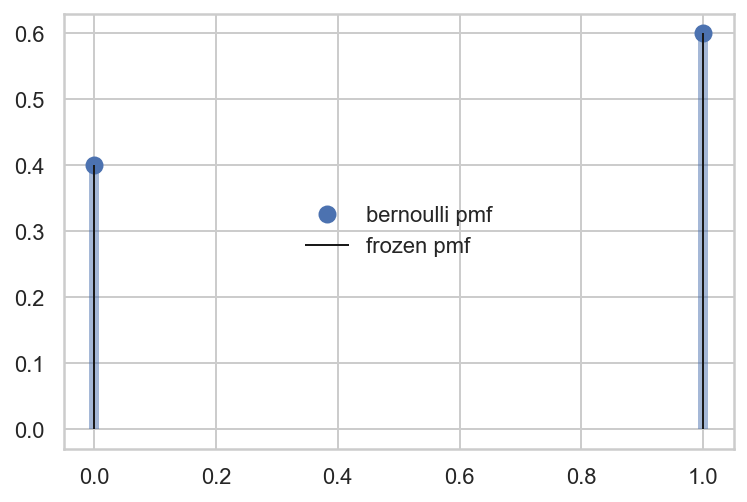

In [9]:
# Set the parameter
p = 0.6

# Bernoulli takes values 0.0 and 1.0
x = [0.0,1.0]

# Plot probability mass function
fig, ax = plt.subplots(1, 1)
ax.plot(x, bernoulli.pmf(x, p), 'bo', ms=8, label='bernoulli pmf')
ax.vlines(x, 0, bernoulli.pmf(x, p), colors='b', lw=5, alpha=0.5)
rv = bernoulli(p) # We can fix the parameters and save the distribution as frozen
ax.vlines(x, 0, rv.pmf(x), colors='k', linestyles='-', lw=1, label='frozen pmf')
ax.legend(loc='center', frameon=False)
plt.show()

#### [Binomial](https://en.wikipedia.org/wiki/Binomial_distribution)

In [10]:
from scipy.stats import binom

# Set the parameters
n, p = 10, 0.5

# Calculate statistics
mean, var, skew, kurt = binom.stats(n, p, moments='mvsk')
print(mean, var, skew, kurt, sep=" ; ")

5.0 ; 2.5 ; 0.0 ; -0.2


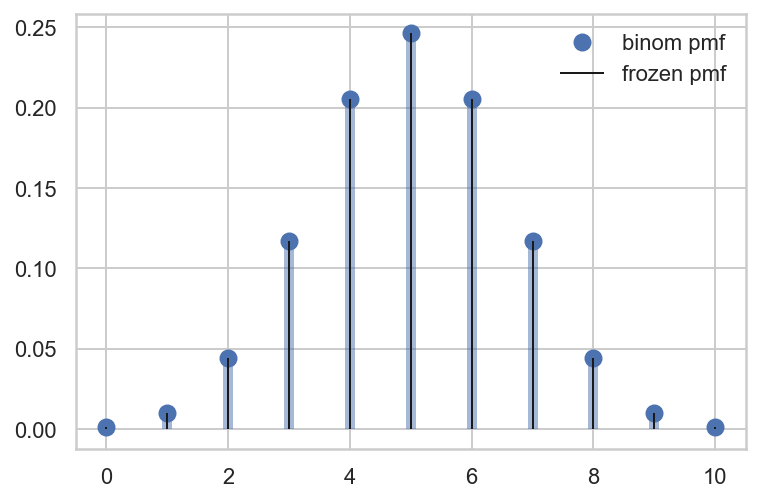

In [11]:
# Set the parameters
n, p = 10, 0.5

# Binomial takes values in {0, 1, ..., n}
x = range(0, n+1)

# Plot the pmf
fig, ax = plt.subplots(1, 1)
ax.plot(x, binom.pmf(x, n, p), 'bo', ms=8, label='binom pmf')
ax.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)
rv = binom(n, p)
ax.vlines(x, 0, rv.pmf(x), colors='k', linestyles='-', lw=1, label='frozen pmf')
ax.legend(loc='best', frameon=False)
plt.show()

## Continuous Random Variables

### [Uniform](https://en.wikipedia.org/wiki/Continuous_uniform_distribution)

In [12]:
from scipy.stats import uniform

# Calculate statistics
mean, var, skew, kurt = uniform.stats(moments='mvsk')
print(mean, var, skew, kurt, sep=" ; ")

0.5 ; 0.08333333333333333 ; 0.0 ; -1.2


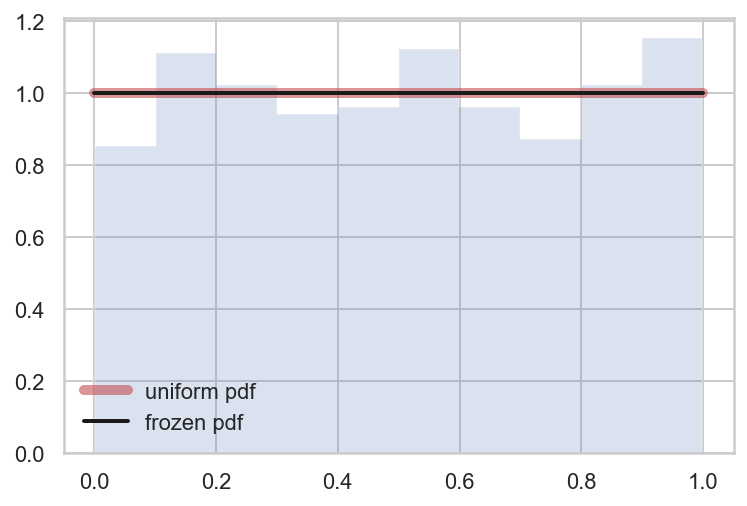

In [15]:
# Generate a sample
r = uniform.rvs(size=1000)

# Plot the histogram of the sample and the probability density functio
fig, ax = plt.subplots(1, 1)
# U(0,1) takes values on the interval [0,1]
x = np.linspace(0.0, 1.0, 100)
ax.plot(x, uniform.pdf(x), 'r-', lw=5, alpha=0.6, label='uniform pdf')
ax.legend(loc='best', frameon=False)
rv = uniform()
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()

#### [Normal](https://en.wikipedia.org/wiki/Normal_distribution)

In [16]:
from scipy.stats import norm 

# Calculate statistics
mean, var, skew, kurt = norm.stats(moments='mvsk')
print(mean, var, skew, kurt, sep=" ; ")

0.0 ; 1.0 ; 0.0 ; 0.0


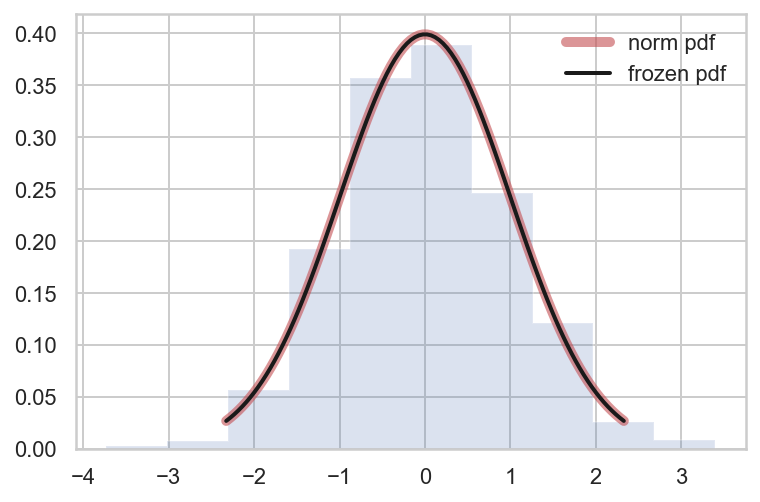

In [17]:
# Generate a random sample from the standard normal
r = norm.rvs(size=1000) 

# Plot the histogram and the probability density function (pdf)
fig, ax = plt.subplots(1, 1)
x = np.linspace(norm.ppf(0.01), norm.ppf(0.99), 100)
ax.plot(x, norm.pdf(x), 'r-', lw=5, alpha=0.6, label='norm pdf')
rv = norm()
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()

#### [Log-normal](https://en.wikipedia.org/wiki/Log-normal_distribution)

In [18]:
from scipy.stats import lognorm
# Set the parameter
s= 1.0 

# Calculate statistics
mean, var, skew, kurt = lognorm.stats(s=s, moments='mvsk')
print(mean, var, skew, kurt, sep=" ; ")

1.6487212707001282 ; 4.670774270471604 ; 6.184877138632554 ; 110.9363921763115


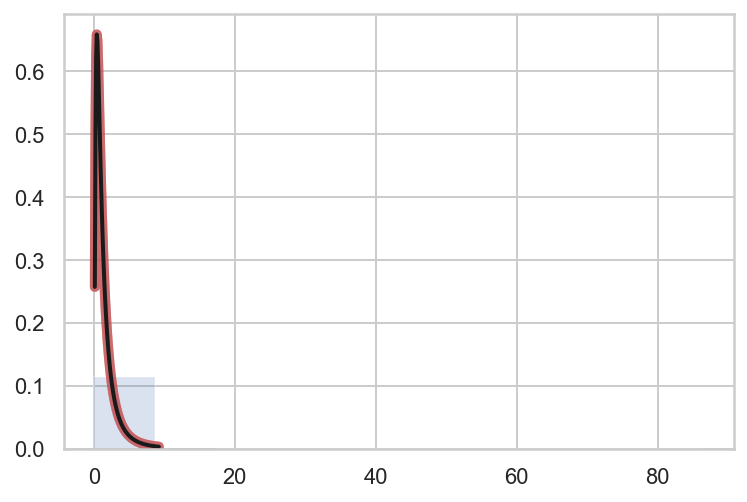

In [19]:
# Set the parameter
s = 0.954 

# Generate random sample
r = lognorm.rvs(s, size=1000)  

# Plot the histogram and the probability density function (pdf)
fig, ax = plt.subplots(1, 1) #Plot
x = np.linspace(lognorm.ppf(0.01, s), lognorm.ppf(0.99, s), 100)
ax.plot(x, lognorm.pdf(x, s), 'r-', lw=5, alpha=0.6, label='lognorm pdf')
x = np.linspace(lognorm.ppf(0.01, s), lognorm.ppf(0.99, s), 100)
ax.plot(x, lognorm.pdf(x, s), 'r-', lw=5, alpha=0.6, label='lognorm pdf')
rv = lognorm(s)
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)
plt.show()